In [1]:
#Using Moving Average Convergence/divergenece

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
df=pd.read_csv('AAPL.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-06-17,130.070007,133.080002,129.809998,131.559998,131.377502,134520300
1,2022-06-21,133.419998,137.059998,133.320007,135.869995,135.681534,81000500
2,2022-06-22,134.789993,137.759995,133.910004,135.350006,135.162262,73409200
3,2022-06-23,136.820007,138.589996,135.630005,138.270004,138.078201,72433800
4,2022-06-24,139.899994,141.910004,139.770004,141.660004,141.463501,89116800
...,...,...,...,...,...,...,...
78,2022-10-10,140.419998,141.889999,138.570007,140.419998,140.419998,74899000
79,2022-10-11,139.899994,141.350006,138.220001,138.979996,138.979996,77033700
80,2022-10-12,139.130005,140.360001,138.160004,138.339996,138.339996,70433700
81,2022-10-13,134.990005,143.589996,134.369995,142.990005,142.990005,113224000


In [4]:
#set date to index
df=df.set_index(pd.DatetimeIndex(df['Date'].values))

In [5]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
2022-06-17,2022-06-17,130.070007,133.080002,129.809998,131.559998,131.377502,134520300
2022-06-21,2022-06-21,133.419998,137.059998,133.320007,135.869995,135.681534,81000500
2022-06-22,2022-06-22,134.789993,137.759995,133.910004,135.350006,135.162262,73409200
2022-06-23,2022-06-23,136.820007,138.589996,135.630005,138.270004,138.078201,72433800
2022-06-24,2022-06-24,139.899994,141.910004,139.770004,141.660004,141.463501,89116800
...,...,...,...,...,...,...,...
2022-10-10,2022-10-10,140.419998,141.889999,138.570007,140.419998,140.419998,74899000
2022-10-11,2022-10-11,139.899994,141.350006,138.220001,138.979996,138.979996,77033700
2022-10-12,2022-10-12,139.130005,140.360001,138.160004,138.339996,138.339996,70433700
2022-10-13,2022-10-13,134.990005,143.589996,134.369995,142.990005,142.990005,113224000


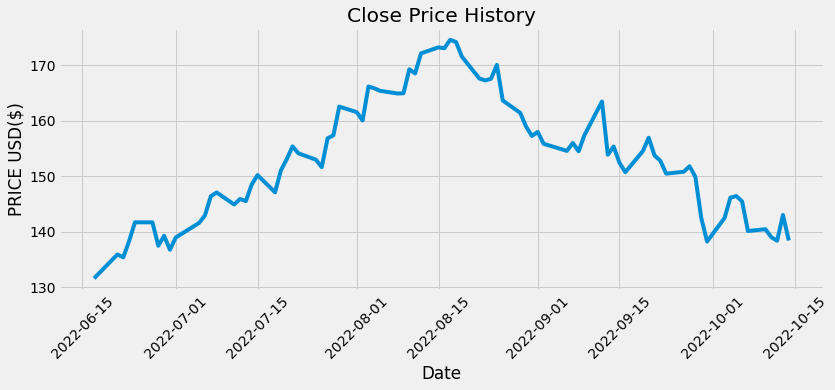

In [6]:
#visualise the stock price
plt.figure(figsize=(12.2,4.5))
plt.plot(df['Close'],label='Close')
plt.xticks(rotation=45)
plt.title('Close Price History')
plt.xlabel('Date')
plt.ylabel('PRICE USD($)')
plt.show()


In [7]:
#Calculate the MACD and signal indicators
#calculate short term EMA
shortEMA=df.Close.ewm(span=12,adjust=False).mean()
#calculate short term EMA
LongEMA=df.Close.ewm(span=26,adjust=False).mean()
#calculate the MACD line
MACD=shortEMA-LongEMA

In [8]:
#signal line
signal=MACD.ewm(span=9,adjust=False).mean()

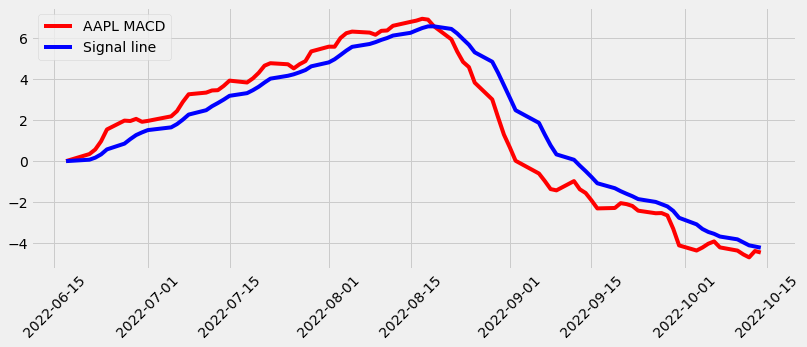

In [9]:
#plot
plt.figure(figsize=(12.2,4.5))
plt.plot(df.index,MACD,label="AAPL MACD",color='red')
plt.plot(df.index,signal,label='Signal line',color='blue')
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.show()

In [10]:
 #create new columns for data
df['MACD']=MACD
df['Signal line']=signal 

In [11]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,MACD,Signal line
2022-06-17,2022-06-17,130.070007,133.080002,129.809998,131.559998,131.377502,134520300,0.000000,0.000000
2022-06-21,2022-06-21,133.419998,137.059998,133.320007,135.869995,135.681534,81000500,0.343817,0.068763
2022-06-22,2022-06-22,134.789993,137.759995,133.910004,135.350006,135.162262,73409200,0.567791,0.168569
2022-06-23,2022-06-23,136.820007,138.589996,135.630005,138.270004,138.078201,72433800,0.969733,0.328802
2022-06-24,2022-06-24,139.899994,141.910004,139.770004,141.660004,141.463501,89116800,1.544021,0.571846
...,...,...,...,...,...,...,...,...,...
2022-10-10,2022-10-10,140.419998,141.889999,138.570007,140.419998,140.419998,74899000,-4.363238,-3.815666
2022-10-11,2022-10-11,139.899994,141.350006,138.220001,138.979996,138.979996,77033700,-4.549526,-3.962438
2022-10-12,2022-10-12,139.130005,140.360001,138.160004,138.339996,138.339996,70433700,-4.694687,-4.108888
2022-10-13,2022-10-13,134.990005,143.589996,134.369995,142.990005,142.990005,113224000,-4.383975,-4.163905


In [12]:
#create function to signal when to buy and sell
def buy_sell(signal):
    Buy= []
    Sell= []
    flag=-1
    for i in range(0,len(signal)):
        if signal['MACD'][i] > signal['Signal line'][i]:
            Sell.append(np.nan)
            if flag!=1:
                Buy.append(signal['Close'][i])
                flag=1
            else:
                 Buy.append(np.nan)
        elif signal['MACD'][i] < signal['Signal line'][i]:
            Buy.append(np.nan)
            if flag !=0:
                Sell.append(signal['Close'][i])
                flag=0
            else  :
                    Sell.append(np.nan)
        else:  
                                    Buy.append(np.nan)
                                    Sell.append(np.nan)
    return (Buy,Sell)       

In [13]:
#create buy and sell column
a=buy_sell(df)
df['Buy_Signal_Price']=a[0]
df['Sell_Signal_Price']=a[1]

In [14]:
#showing the data
1
#showing the data
2
df


,Date,Open,High,Low,Close,Adj Close,Volume,MACD,Signal line,Buy_Signal_Price,Sell_Signal_Price
2022-06-17,2022-06-17,130.070007,133.080002,129.809998,131.559998,131.377502,134520300,0.000000,0.000000,NaN,NaN
2022-06-21,2022-06-21,133.419998,137.059998,133.320007,135.869995,135.681534,81000500,0.343817,0.068763,135.869995,NaN
2022-06-22,2022-06-22,134.789993,137.759995,133.910004,135.350006,135.162262,73409200,0.567791,0.168569,NaN,NaN
2022-06-23,2022-06-23,136.820007,138.589996,135.630005,138.270004,138.078201,72433800,0.969733,0.328802,NaN,NaN
2022-06-24,2022-06-24,139.899994,141.910004,139.770004,141.660004,141.463501,89116800,1.544021,0.571846,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2022-10-10,2022-10-10,140.419998,141.889999,138.570007,140.419998,140.419998,74899000,-4.363238,-3.815666,NaN,NaN
2022-10-11,2022-10-11,139.899994,141.350006,138.220001,138.979996,138.979996,77033700,-4.549526,-3.962438,NaN,NaN
2022-10-12,2022-10-12,139.130005,140.360001,138.160004,138.339996,138.339996,70433700,-4.694687,-4.108888,NaN,NaN
2022-10-13,2022-10-13,134.990005,143.589996,134.369995,142.990005,142.990005,113224000,-4.383975,-4.163905,NaN,NaN


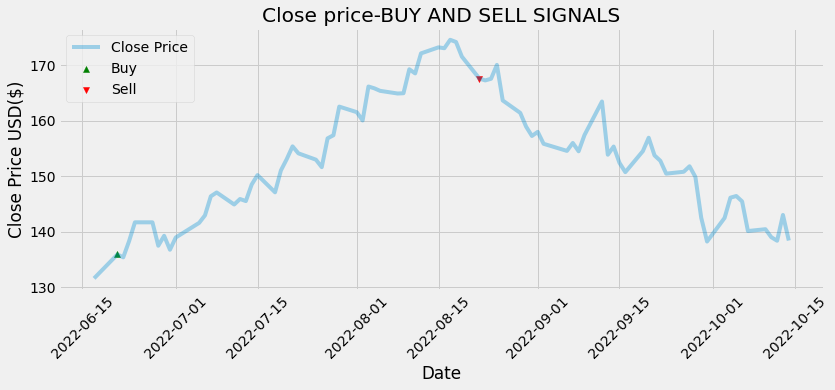

In [15]:
#visualization of the stock buy and sell signals
plt.figure(figsize=(12.2,4.5))
plt.scatter(df.index,df['Buy_Signal_Price'],color='green',label='Buy',marker='^',alpha=1)
plt.scatter(df.index,df['Sell_Signal_Price'],color='red',label='Sell',marker='v',alpha=1)
plt.plot(df['Close'],label='Close Price',alpha=0.35)
plt.title('Close price-BUY AND SELL SIGNALS')
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Close Price USD($)')
plt.legend(loc='upper left')
plt.show()

In [16]:
#support vector classifiers

In [17]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
import warnings
warnings.filterwarnings("ignore")

In [18]:
df2=pd.read_csv('AAPL.csv')

In [19]:
df2

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-06-17,130.070007,133.080002,129.809998,131.559998,131.377502,134520300
1,2022-06-21,133.419998,137.059998,133.320007,135.869995,135.681534,81000500
2,2022-06-22,134.789993,137.759995,133.910004,135.350006,135.162262,73409200
3,2022-06-23,136.820007,138.589996,135.630005,138.270004,138.078201,72433800
4,2022-06-24,139.899994,141.910004,139.770004,141.660004,141.463501,89116800
...,...,...,...,...,...,...,...
78,2022-10-10,140.419998,141.889999,138.570007,140.419998,140.419998,74899000
79,2022-10-11,139.899994,141.350006,138.220001,138.979996,138.979996,77033700
80,2022-10-12,139.130005,140.360001,138.160004,138.339996,138.339996,70433700
81,2022-10-13,134.990005,143.589996,134.369995,142.990005,142.990005,113224000


In [20]:
df2['Open-Close']=df2.Open-df2.Close
df2['High-Low']=df2.High- df2.Low

import talib as ta
df2=df2.dropna()
x=df2[['Open-Close','High-Low']]
x.tail()

,Open-Close,High-Low
78,0.000000,3.319992
79,0.919998,3.130005
80,0.790009,2.199997
81,-8.000000,9.220001
82,5.929993,6.330002


In [21]:
y=np.where(df2['Close'].shift(-1)>df2['Close'],1,0)
y

array([1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0])

In [58]:
split_percentage=0.80
split=int(split_percentage*len(df2))
x_train=x[:split]
y_train=y[:split]

x_test=x[split:]
y_test=y[split:]

In [60]:
 #introducing SVM
from sklearn.svm import SVC
SVC().fit(x,y)


SVC()

In [61]:
cls=SVC().fit(x_train,y_train)

In [62]:
#predict signal

In [63]:
from sklearn.metrics import accuracy_score



In [64]:
accuracy_train=accuracy_score(y_train,cls.predict(x_train))


In [65]:
accuracy_test=accuracy_score(y_test,cls.predict(x_test))
print('\n Train Accuracy:{: .2f}%'.format(accuracy_train*100))
print('\n Test Accuracy:{: .2f}%'.format(accuracy_test*100))


 Train Accuracy: 56.06%

 Test Accuracy: 52.94%


In [72]:
df2['predicted_signal']=cls.predict(x)
df2['Return']=df2.Close.pct_change()
df2['strategy']=df2.Return*df2.predicted_signal.shift(1)

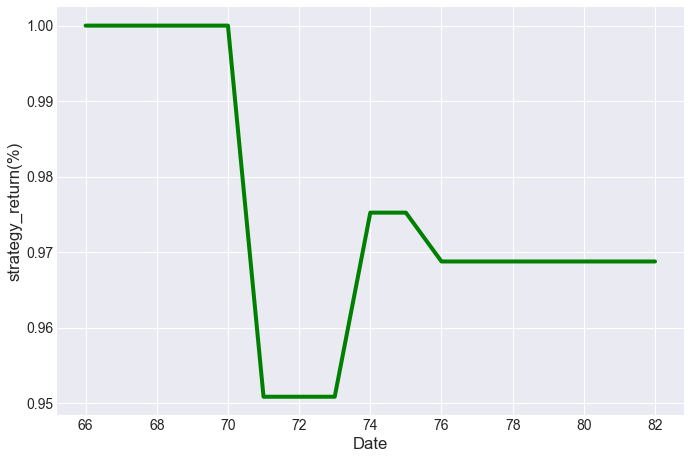

In [76]:
df2['strategy_return']=df2.Return*df2.predicted_signal.shift(1)
geometric_returns=(df2.strategy_return.iloc[split:]+1).cumprod()
geometric_returns.plot(figsize=(10,7),color='g')
plt.ylabel("strategy_return(%)")
plt.xlabel("Date")
plt.show()